In [1]:
import pandas as pd
import numpy as np

# These CSV files are from the NHTSA crash data available at thier website. 
# The link is provided in the README.md file.
accident = pd.read_csv(r"../Primary_Sources/accident.csv")
person = pd.read_csv(r"../Primary_Sources/person.csv")
vehicle = pd.read_csv(r"../Primary_Sources/vehicle.csv")

merged = pd.merge(vehicle, accident)
print(merged)


/var/folders/lr/yh0jnvpd6ln1zmg8bc1pvvrh0000gn/T/ipykernel_14154/2528632793.py:8: DtypeWarning: Columns (53,63,67) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle = pd.read_csv(r"../Primary_Sources/vehicle.csv")


       STATE STATENAME  ST_CASE  VEH_NO  VE_FORMS  MONTH MONTHNAME  DAY  \
0          1   Alabama    10001       1         1      1   January    4   
1          1   Alabama    10002       1         1      3     March   20   
2          1   Alabama    10003       1         1      3     March   18   
3          1   Alabama    10004       1         1      3     March   17   
4          1   Alabama    10005       1         1      3     March   17   
...      ...       ...      ...     ...       ...    ...       ...  ...   
58314     56   Wyoming   560118       1         1     12  December   26   
58315     56   Wyoming   560119       1         1     12  December   27   
58316     56   Wyoming   560120       1         2     12  December   29   
58317     56   Wyoming   560120       2         2     12  December   29   
58318     56   Wyoming   560121       1         1     12  December   31   

       DAYNAME  HOUR  ...          NOT_MINNAME  ARR_HOUR  \
0            4    22  ...              

In [2]:
print(merged['BODY_TYP'].value_counts())

# Created a dictionary from the FARS manual, the link is availble in the README.md file and the NHTSA website.
# Related Images can be found in the Images folder of this repository.
# This dictionary maps the BODY_TYP codes to their corresponding names
body_type_map = {
    1: 'Convertible/Cabriolet',
    2: 'Minivan',
    3: 'Coupe',
    4: 'Low Speed Vehicle (LSV)/Neighborhood Electric Vehicle (NEV)',
    5: 'Hatchback/Liftback/Notchback',
    7: 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)',
    8: 'Crossover Utility Vehicle (CUV)',
    10: 'Roadster',
    13: 'Sedan/Saloon',
    60: 'Pickup',
    90: 'Other Light Vehicle'
}

merged['BodyType_Name'] = merged['BODY_TYP'].map(body_type_map)

merged_filtered = merged.dropna(subset=['BodyType_Name'])

suvs_and_cuvs = merged[merged['BODY_TYP'].isin([7, 8])]

light_vehicles_df = merged[merged['GVWR_FROM'] == 11].copy()

suv_cuv_codes = [7, 8]

light_vehicles_df['BodyType_Name'] = light_vehicles_df['BODY_TYP'].map(body_type_map)

light_vehicles_df['Is_Crossover'] = light_vehicles_df['BODY_TYP'].isin(suv_cuv_codes)

crossover_comparison = light_vehicles_df['Is_Crossover'].value_counts()

crash_counts = light_vehicles_df['BodyType_Name'].value_counts()

print(crossover_comparison)


BODY_TYP
4     14600
34     9359
14     8696
80     5794
15     3151
      ...  
73        2
48        2
7         1
45        1
22        1
Name: count, Length: 62, dtype: int64
Is_Crossover
False    38706
True        41
Name: count, dtype: int64


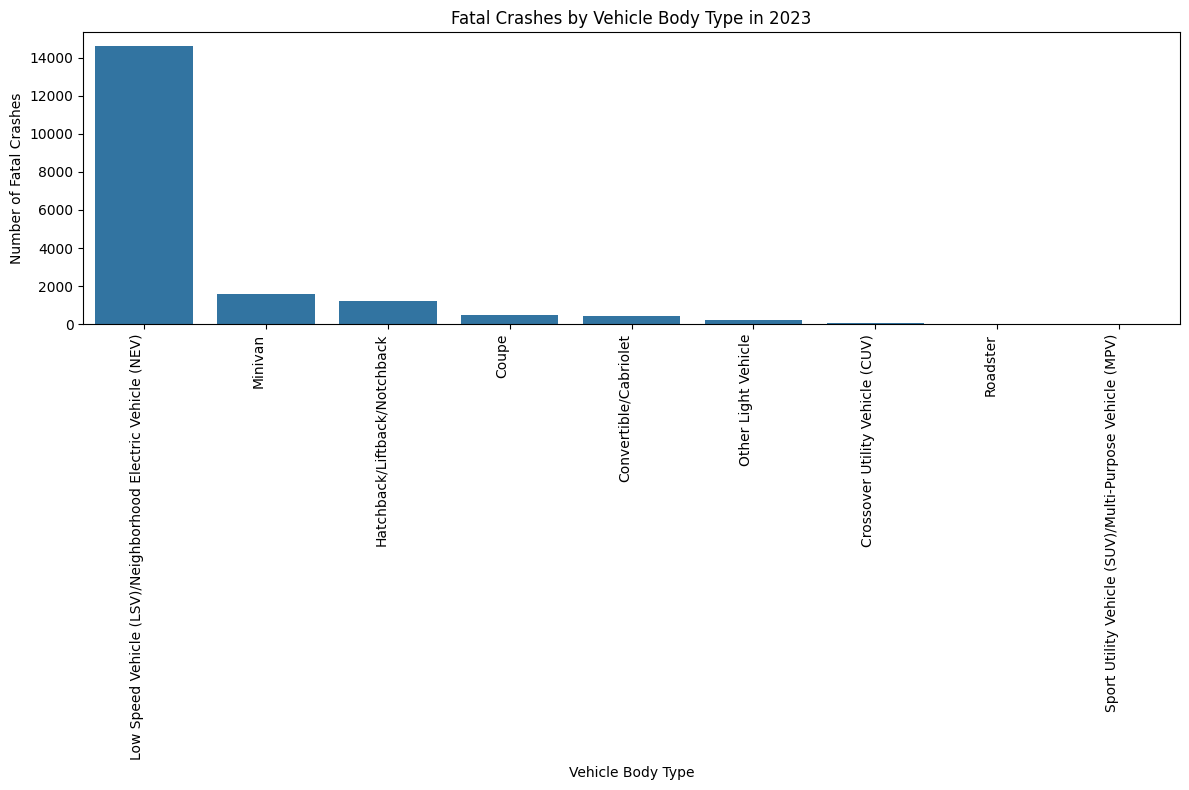

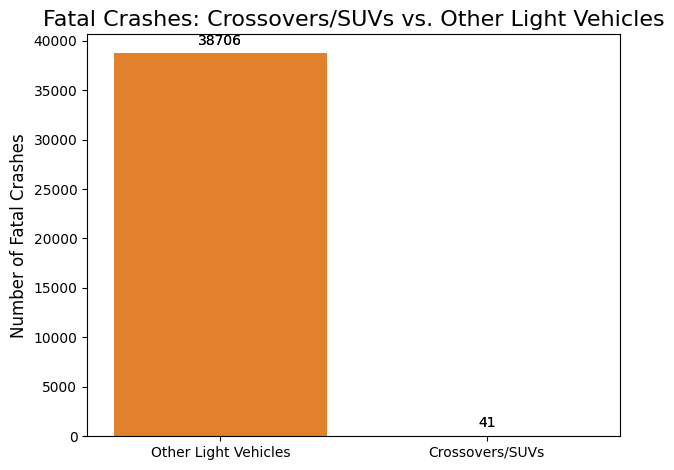

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=crash_counts.index, y=crash_counts.values)
plt.xlabel('Vehicle Body Type')
plt.ylabel('Number of Fatal Crashes')
plt.title('Fatal Crashes by Vehicle Body Type in 2023')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.show()


sns.barplot(x=crossover_comparison.index, y=crossover_comparison.values)
ax = sns.barplot(x=crossover_comparison.index, y=crossover_comparison.values)
plt.title('Fatal Crashes: Crossovers/SUVs vs. Other Light Vehicles', fontsize=16)
plt.ylabel('Number of Fatal Crashes', fontsize=12)
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Other Light Vehicles', 'Crossovers/SUVs'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()
plt.show()

Fatalities by body type:
 BodyType_Name
Convertible/Cabriolet                                            475
Coupe                                                            511
Crossover Utility Vehicle (CUV)                                   42
Hatchback/Liftback/Notchback                                    1364
Low Speed Vehicle (LSV)/Neighborhood Electric Vehicle (NEV)    16352
Minivan                                                         1765
Other Light Vehicle                                              248
Roadster                                                           7
Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)            1
Name: FATALS, dtype: int64


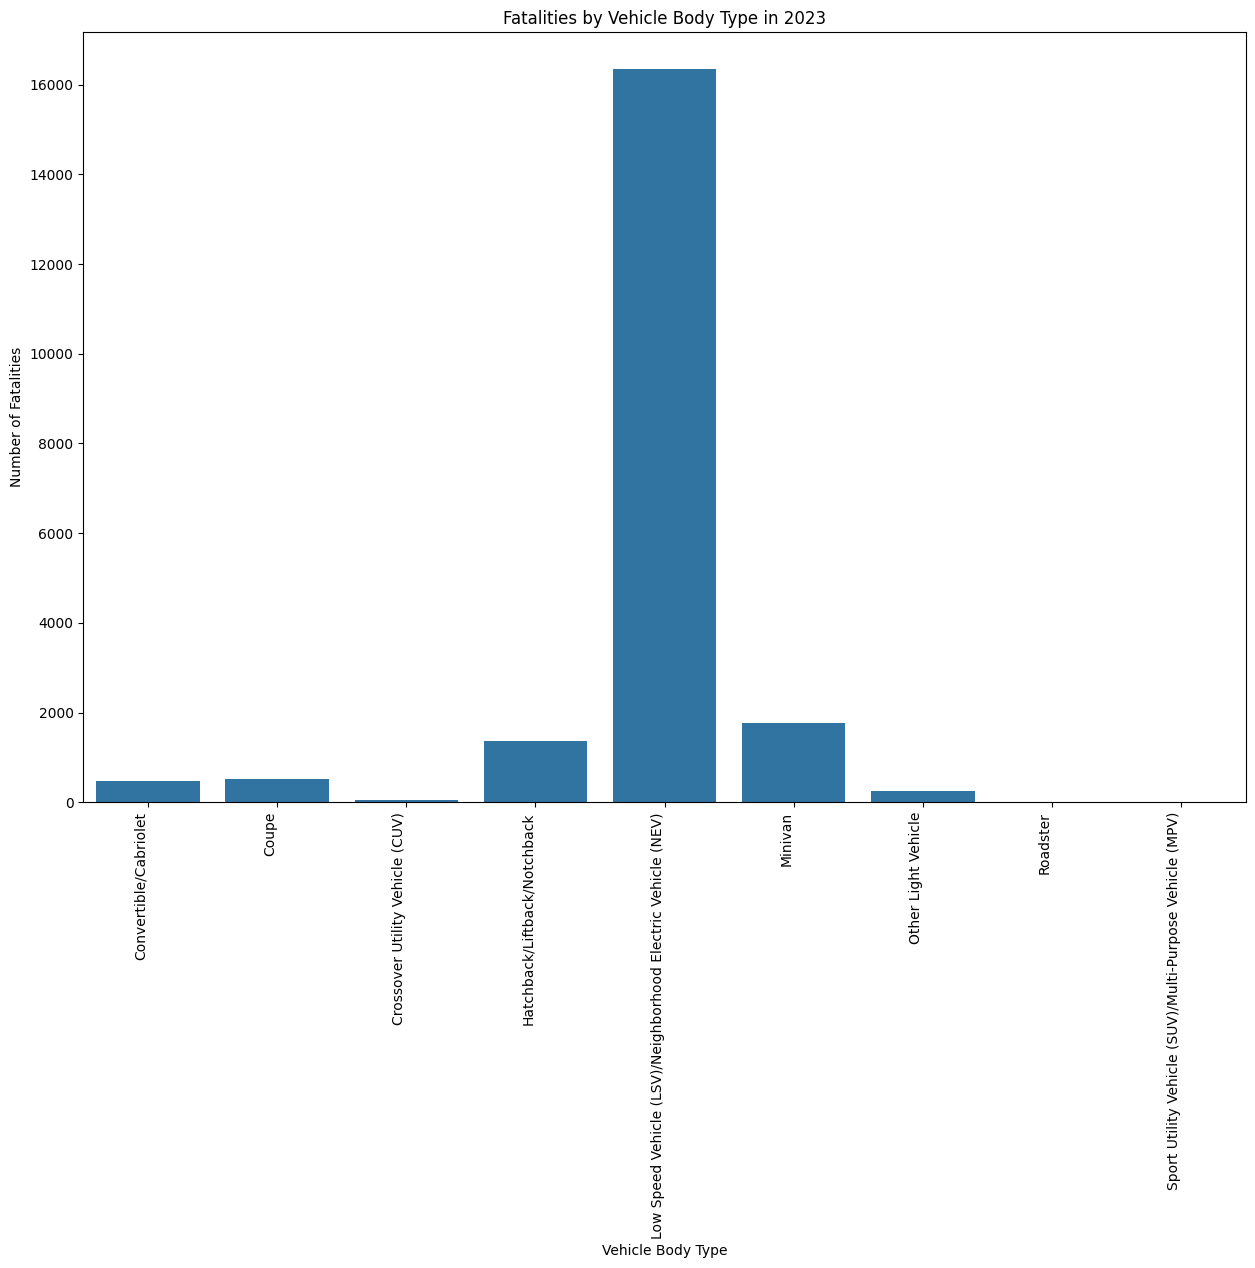

In [4]:
fatal_by_body = light_vehicles_df.groupby('BodyType_Name')['FATALS'].sum()
print("Fatalities by body type:\n", fatal_by_body)

plt.figure(figsize=(15, 10))
sns.barplot(x=fatal_by_body.index, y=fatal_by_body.values)
plt.xlabel('Vehicle Body Type')
plt.ylabel('Number of Fatalities')  
plt.xticks(rotation=90, ha='right')
plt.title('Fatalities by Vehicle Body Type in 2023')
plt.show()